**PROJECT : WRANGLE & ANALYZE DATA**

**Post review comment changes - Submission #2**

1) Please include the code from the twitter_api.py in the Jupyter notebook **Had included the first time around. But due to long running time with failed responses, removed it. Now its added again and proceeded with the given tweet-json text file**<br>
2) Download the image predictions data, save it locally and then read it.**Missed it first time Done** <br> 
3) Though this issue is used for merging datasets but individually, it's a quality issue. So move it to quality section.**Done** <br> 
4) Clean all invalid names & Merge the dog stages properly **Didnt noticed it, Thanks. It's done** <br> 
5) Since the report is based on the Assessment and Cleaning process so please review the report again after completing those sections and make the necessary changes.**Have updated all of the visualizations and modified few notes** <br>
6) Try to consider this report as a blog post. You can add images of dogs, tweets, ratings to make it a fun read. Anything to get the reader engaged **Though i have added a part in both documents i was unable to redo entire document due analysis already done. Hope that's ok** <br>

In [300]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt

**Gathering Data**

**Reading in twitter archive csv file**

In [301]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Reading in image predicion tsv file**

In [303]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [304]:
df_pred = pd.read_csv('image_predictions.tsv',delimiter='\t')

In [305]:
df_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

**Connecting with JSON from Twitter API**

In [306]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [307]:
with open('tweet_json.txt', 'r') as test:
    for l in test:
        testdata = json.loads(l)
        print(json.dumps(testdata, indent=2))
        break

**Using the file provided to proceed**

In [308]:
tweet_labels = ['id', 'favorite_count', 'retweet_count']
dict_tweets = []

with open('tweet-json.txt', 'r') as jsfile:
    tweet_line = jsfile.readline()
    # Extracting each line
    while tweet_line:
        dict1 = json.loads(tweet_line)
        dict_values = dict((id_val, dict1[id_val]) for id_val in tweet_labels)
        dict_tweets.append(dict_values)
        
        tweet_line = jsfile.readline()
    
df_tweet = pd.DataFrame.from_dict(dict_tweets)

In [309]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**ASSESS DATA**

**Visual Assessment & Programmatic assessment - Tweet Archive Enhanced file : Dataframe = df**

In [310]:
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [312]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [313]:
df[df.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [314]:
df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Bailey         7
Toby           7
Buddy          7
an             7
Rusty          6
Scout          6
Jax            6
Dave           6
Oscar          6
Milo           6
Koda           6
Leo            6
Stanley        6
Bella          6
Jack           6
George         5
            ... 
Eevee          1
Ace            1
Sailer         1
Gòrdón         1
Shelby         1
Tommy          1
Odin           1
Gabby          1
Anthony        1
Rose           1
Laela          1
Jazz           1
Harnold        1
Sonny          1
Pancake        1
Kara           1
Raphael        1
Tebow          1
Taz            1
Scruffers      1
Katie          1
Boots          1
Hanz           1
Lorelei        1
Ozzie          1
Maude          1
Rumpole        1
Ralpher       

**POST FEEDBACK Checking if there is pattern to incorrect names**

In [315]:
df[df.name.str.islower()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
22    887517139158093824                    NaN                  NaN   
56    881536004380872706                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
169   859196978902773760                    NaN                  NaN   
193   855459453768019968                    NaN                  NaN   
335   832645525019123713                    NaN                  NaN   
369   828650029636317184                    NaN                  NaN   
542   806219024703037440                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
682   788552643979468800                    NaN                  NaN   
759   778396591732486144                    NaN                  NaN   
773   776249906839351296                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
819   770655142660169732                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
852   765395769549590528                    NaN                  NaN   
924   755206590534418437                    NaN                  NaN   
988   748977405889503236                    NaN                  NaN   
992   748692773788876800                    NaN                  NaN   
993   748575535303884801                    NaN                  NaN   
1002  747885874273214464                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1025  746369468511756288                    NaN                  NaN   
1031  745422732645535745                    NaN                  NaN   
1040  744223424764059648                    NaN                  NaN   
1049  743222593470234624                    NaN                  NaN   
1063  741067306818797568                    NaN                  NaN   
1071  740214038584557568                    NaN                  NaN   
1095  736392552031657984                    NaN                  NaN   
...                  ...                    ...                  ...   
2191  668955713004314625                    NaN                  NaN   
2198  668815180734689280                    NaN                  NaN   
2204  668636665813057536                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
2212  668587383441514497                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2222  668466899341221888                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN         

In [316]:
df[df.name.str.isupper()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
775   776201521193218049                    NaN                  NaN   
2041  671542985629241344                    NaN                  NaN   

                      timestamp  \
775   2016-09-14 23:30:38 +0000   
2041  2015-12-01 04:14:59 +0000   

                                                 source  \
775   <a href="http://twitter.com/download/iphone" r...   
2041  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
775   This is O'Malley. That is how he sleeps. Doesn...                  NaN   
2041  This is JD (stands for "just dog"). He's like ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
775                        NaN                        NaN   
2041                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
775   https://twitter.com/dog_rates/status/776201521...                10   
2041  https://twitter.com/dog_rates/status/671542985...                10   

      rating_denominator name doggo floofer pupper puppo  
775                   10    O  None    None   None  None  
2041                  10   JD  None    None   None  None

**Trying to see if there is a different pattern in the tweet text where the name is not identified**

In [317]:
df[(df.name=='None')|(df.name=='a')|(df.name=='the')]['text']

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
35      I have a new hero and his name is Howard. 14/1...
37      Here we have a corgi undercover as a malamute....
41      I present to you, Pup in Hat. Pup in Hat is gr...
42      OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...
47      Please only send dogs. We don't rate mechanics...
55      @roushfenway These are good dogs but 17/10 is ...
56      Here is a pupper approaching maximum borkdrive...
59      Ugh not again. We only rate dogs. Please don't...
62      Please don't send in photos without dogs in th...
64                        @RealKentMurphy 14/10 confirmed
72      Martha

**Rating numerator is has unexpected range with 25 percentile at 10 and max of 1776. Drilling down a bit**

In [318]:
df[df['rating_numerator'].isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

**Executing as per review comment to check if there are multiple categories in dog stage columns**

In [319]:
df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
191   855851453814013952                    NaN                  NaN   
200   854010172552949760                    NaN                  NaN   
460   817777686764523521                    NaN                  NaN   
531   808106460588765185                    NaN                  NaN   
565   802265048156610565           7.331095e+17         4.196984e+09   
575   801115127852503040                    NaN                  NaN   
705   785639753186217984                    NaN                  NaN   
733   781308096455073793                    NaN                  NaN   
778   775898661951791106                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
889   759793422261743616                    NaN                  NaN   
956   751583847268179968                    NaN                  NaN   
1063  741067306818797568                    NaN                  NaN   
1113  733109485275860992                    NaN                  NaN   

                      timestamp  \
191   2017-04-22 18:31:02 +0000   
200   2017-04-17 16:34:26 +0000   
460   2017-01-07 16:59:28 +0000   
531   2016-12-12 00:29:28 +0000   
565   2016-11-25 21:37:47 +0000   
575   2016-11-22 17:28:25 +0000   
705   2016-10-11 00:34:48 +0000   
733   2016-09-29 01:42:20 +0000   
778   2016-09-14 03:27:11 +0000   
822   2016-08-29 03:00:36 +0000   
889   2016-07-31 16:50:42 +0000   
956   2016-07-09 01:08:47 +0000   
1063  2016-06-10 00:39:48 +0000   
1113  2016-05-19 01:38:16 +0000   

                                                 source  \
191   <a href="http://twitter.com/download/iphone" r...   
200   <a href="http://twitter.com/download/iphone" r...   
460   <a href="http://twitter.com/download/iphone" r...   
531   <a href="http://twitter.com/download/iphone" r...   
565   <a href="http://twitter.com/download/iphone" r...   
575   <a href="http://twitter.com/download/iphone" r...   
705   <a href="http://twitter.com/download/iphone" r...   
733   <a href="http://vine.co" rel="nofollow">Vine -...   
778   <a href="http://twitter.com/download/iphone" r...   
822   <a href="http://twitter.com/download/iphone" r...   
889   <a href="http://twitter.com/download/iphone" r...   
956   <a href="http://twitter.com/download/iphone" r...   
1063  <a href="http://twitter.com/download/iphone" r...   
1113  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
191   Here's a puppo participating in the #ScienceMa...                  NaN   
200   At first I thought this was a shy doggo, but i...                  NaN   
460   This is Dido. She's playing the lead role in "...                  NaN   
531   Here we have Burke (pupper) and Dexter (doggo)...                  NaN   
565   Like doggo, like pupper version 2. Both 11/10 ...                  NaN   
575   This is Bones. He's being haunted by another d...                  NaN   
705   This is Pinot. He's a sophisticated doggo. You...                  NaN   
733   Pupper butt 1, Doggo 0. Both 12/10 https://t.c...                  NaN   
778   RT @dog_rates: Like father (doggo), like son (...         7.331095e+17   
822   RT @dog_rates: This is just downright precious...         7.410673e+17   
889   Meet Maggie &amp; Lila. Maggie is the doggo, L...                  NaN   
956   Please stop sending it pictures that don't eve...                  NaN   
1063  This is just downright precious af. 12/10 for ...                  NaN   
1113  Like father (doggo), like son (pupper). Both 1...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
191                        NaN                        NaN   
200                        NaN                        NaN   
460                        NaN                        NaN   
531                        NaN                        NaN   
565              

In [320]:
df[df.rating_numerator > 20]['text']

188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
290                                    @markhoppus 182/10
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
340     RT @dog_rates: This is Logan, the Chow who liv...
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy 

In [321]:
df[df.rating_numerator < 10]['text']

45      This is Bella. She hopes her smile made you sm...
229     This is Jerry. He's doing a distinguished tong...
315     When you're so blinded by your systematic plag...
387     I was going to do 007/10, but the joke wasn't ...
462     RT @dog_rates: Meet Herschel. He's slightly bi...
485     RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...
599     RT @dog_rates: Here we see a rare pouched pupp...
605     RT @dog_rates: Not familiar with this breed. N...
730     Who keeps sending in pictures without dogs in ...
745     RT @dog_rates: This is Hank. He's mischievous ...
764     RT @dog_rates: Meet Gerald. He's a fairly exot...
765     This is Wesley. He's clearly trespassing. Seem...
784     RT @dog_rates: After so many requests, this is...
814     Another pic without a dog in it? What am I sup...
835     Meet Gerald. He's a fairly exotic doggo. Floof...
845     This is Shadoe. Her tongue flies out of her mo...
859     This is Clark. He collects teddy bears. It's a...
860     RT @do

*Ok they do rate few dogs less than 10 but this also includes some non dog pictures as well*

In [322]:
df[df['retweeted_status_id'].notnull()]['text']

19      RT @dog_rates: This is Canela. She attempted s...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36      RT @dog_rates: This is Lilly. She just paralle...
68      RT @dog_rates: This is Emmy. She was adopted t...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
74      RT @dog_rates: Meet Terrance. He's being yelle...
78      RT @rachel2195: @dog_rates the boyfriend and h...
91      RT @dog_rates: This is Coco. At first I though...
95      RT @dog_rates: This is Walter. He won't start ...
97      RT @dog_rates: This is Sierra. She's one preci...
101     RT @loganamnosis: Penelope here is doing me qu...
109     RT @dog_rates: This is Dawn. She's just checki...
118     RT @dog_rates: We only rate dogs. This is quit...
124     RT @dog_rates: Say hello to Cooper. His expres...
130     RT @rachaeleasler: these @dog_rates hats are 1...
132     RT @dog_rates: This is Jamesy. He gives a kiss...
137     RT @dog_rates: Here's a pupper before and afte...
146     RT @do

In [323]:
df[df['expanded_urls'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

**Quality Issues - Tweet Archive**

*Originally order of observations was as observed (visual assessment ones first and so on). butI have reordered the issuesso that data quantity becomes more concise towards the end.*<br>

#1 There are few values in column retweeted_status_id. They must be retweets. To be removed<br>
#2 Few columns which may not be useful for final analysis to be removed<br>
#3 All 4 categories of dogs have none values sometimes<br>
#4 Invalid names starting with lower case letters & having None values<br>
#5 Datetype requires corrections in few columns & Renaming columns appropriately<br>
#6 Numerator values includes decimals<br>
#7 Numerator values greater than 14<br>
#8 Many numerators are less than 10 which seems to be going against the trends of the popular twitter handle. On a closer look, some of them doesnt seem to be dog pictures<br>
#9 Expanded URLS missing for many entries<br>
#10 Tweet id have to be converted to string (object) to be used as unique id across the 3 tables<br>

**Tidiness Issues - Tweet Archive**

#1 Four Dog categories(stages) have to be made into a single column<br>
#2 Merging all 3 dataframes to create one master dataframe<br>

**Visual Assessment & Programmatic assessment - Image predictions file : Dataframe = df_pred**

In [324]:
df_pred

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [325]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [326]:
df_pred.p1.value_counts()
df_pred.p2.value_counts()
df_pred.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [327]:
df_pred[df_pred['p1'].isnull()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [328]:
df_pred[df_pred.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

**Quality Issues - Image Predictions**

1) only 2075 entries are present, the data for remaining ids from df is missing <br>
2) Removal of most columns except tweet_id, img_num (unsure of its uses now),p1, p1_conf & p1_dog  <br>
3) all columns to be renamed appropriately

**Tidiness Issues - Image Predictions**

1) Tweet id have to be converted to string (object) to be used as unique id across the 3 tables*<br>

**Visual Assessment & Programmatic assessment - Tweet extracts : Dataframe = df_tweet**

In [329]:
df_tweet

favorite_count                  id  retweet_count
0              39467  892420643555336193           8853
1              33819  892177421306343426           6514
2              25461  891815181378084864           4328
3              42908  891689557279858688           8964
4              41048  891327558926688256           9774
5              20562  891087950875897856           3261
6              12041  890971913173991426           2158
7              56848  890729181411237888          16716
8              28226  890609185150312448           4429
9              32467  890240255349198849           7711
10             31166  890006608113172480           7624
11             28268  889880896479866881           5156
12             38818  889665388333682689           8538
13             27672  889638837579907072           4735
14             15359  889531135344209921           2321
15             25652  889278841981685760           5637
16             29611  888917238123831296           4709
17             26080  888804989199671297           4559
18             20290  888554962724278272           3732
19             22201  888078434458587136           3653
20             30779  887705289381826560           5609
21             46959  887517139158093824          12082
22             69871  887473957103951883          18781
23             34222  887343217045368832          10737
24             31061  887101392804085760           6167
25             35859  886983233522544640           8084
26             12306  886736880519319552           3443
27             22798  886680336477933568           4610
28             21524  886366144734445568           3316
29               117  886267009285017600              4
...              ...                 ...            ...
2324             459  666411507551481857            339
2325             113  666407126856765440             44
2326             172  666396247373291520             92
2327             194  666373753744588802            100
2328             804  666362758909284353            595
2329             229  666353288456101888             77
2330             307  666345417576210432            146
2331             204  666337882303524864             96
2332             522  666293911632134144            368
2333             152  666287406224695296             71
2334             184  666273097616637952             82
2335             108  666268910803644416             37
2336           14765  666104133288665088           6871
2337              81  666102155909144576             16
2338             164  666099513787052032             73
2339             169  666094000022159362             79
2340             121  666082916733198337             47
2341             335  666073100786774016            174
2342             154  666071193221509120             67
2343             496  666063827256086533            232
2344             115  666058600524156928             61
2345             304  666057090499244032            146
2346             448  666055525042405380            261
2347            1253  666051853826850816            879
2348             136  666050758794694657             60
2349             111  666049248165822465             41
2350             311  666044226329800704            147
2351             128  666033412701032449             47
2352             132  666029285002620928             48
2353            2535  666020888022790149            532

[2354 rows x 3 columns]

In [330]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [331]:
df_tweet.describe()

favorite_count            id  retweet_count
count     2354.000000  2.354000e+03    2354.000000
mean      8080.968564  7.426978e+17    3164.797366
std      11814.771334  6.852812e+16    5284.770364
min          0.000000  6.660209e+17       0.000000
25%       1415.000000  6.783975e+17     624.500000
50%       3603.500000  7.194596e+17    1473.500000
75%      10122.250000  7.993058e+17    3652.000000
max     132810.000000  8.924206e+17   79515.000000

In [332]:
df_tweet[df_tweet.id.duplicated()]

Empty DataFrame
Columns: [favorite_count, id, retweet_count]
Index: []

**Quality Issues - Tweets Extract from Json**

"Unable to find glaring quality issues so far"<br>

**Tidiness Issues - Tweets Extract from Json**

1) Tweet id have to be converted to string (object) to be used as unique id across the 3 tables  *Resolvable*<br>

Programmatically confirming what's visually observable already, duplicate titles between all 3 tables

In [333]:
all_columns = pd.Series(list(df) + list(df_pred) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

**CLEAN DATA**

In [334]:
twitter_archive_clean = df.copy()
image_predictions_clean = df_pred.copy()
tweet_extracts_clean = df_tweet.copy()

In [335]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Quality Issue #1 : There are few values in column retweeted_status_id. They must be retweets. To be removed**

**Define**<br>
Based on asessment output there may be two ways to remove retweets. using "RT @" patterns or selecting non null values in retweeted_status_id. just to confirm their one to one relationship, i will use non null values and test it with patterns

**Code**

In [336]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

**Test**

In [337]:
twitter_archive_clean[twitter_archive_clean.text.str.match('^RT @')]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

**Quality Issue #2 : Few columns which may not be useful for final analysis to be removed**<br>
Expanded_urls will not be useful for final analysis as well but keepting it to use as a cleaning practice to fill missing values

**Code**

In [338]:
# Dropping columns from twitter archive that are not required for analysis
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'source',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'], 1)

In [339]:
# Dropping columns from image predictions that are not required for analysis
image_predictions_clean = image_predictions_clean.drop(['p2',
                                                        'p2_conf',
                                                        'p2_dog',
                                                        'p3',
                                                        'p3_conf',
                                                        'p3_dog',
                                                        'jpg_url', 
                                                        'img_num'], 1)

**Test**

In [340]:
print(list(twitter_archive_clean))

['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [341]:
print(list(image_predictions_clean))

['tweet_id', 'p1', 'p1_conf', 'p1_dog']


**Tidiness Issue #1 : 4 Dog categories have to be made a single column Resolvable**

**Define**<br>
Melt the doggo, floofer, pupper & puppo into a "dog_category" column

**Code**

In [342]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [343]:
#replace None strings & nan values with empty string
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [344]:
twitter_archive_clean['dog_category'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [345]:
twitter_archive_clean.dog_category.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_category, dtype: int64

In [346]:
twitter_archive_clean.loc[((twitter_archive_clean.dog_category == 'doggopupper') | (twitter_archive_clean.dog_category == 'doggopuppo')| (twitter_archive_clean.dog_category == 'doggofloofer')), 'dog_category'] = 'multiple'

In [347]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [348]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_category          2175 non-null object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


**Test**

In [349]:
twitter_archive_clean.dog_category.value_counts()

            1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_category, dtype: int64

**Quality Issue #10 :Tweet id have to be converted to string (object) to be used as unique id across the 3 tables**

**Define**<br>
Convert datatype of tweet_id in twitter archive & image predictions table to str (object)
Convert datatype of id in tweet extracts to str (object) and rename it to tweet_id

**Code**

In [350]:
twitter_archive_clean['tweet_id'] =twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweet_extracts_clean['id'] = tweet_extracts_clean['id'].astype(str)
#renaming id column in tweet extracts to make it same as the other two tables
new_col_names = {'id':'tweet_id'}
tweet_extracts_clean.rename(columns= new_col_names, inplace=True)

**Test**

In [351]:
all_columns = pd.Series(list(twitter_archive_clean) + list(image_predictions_clean) + list(tweet_extracts_clean))
all_columns[all_columns.duplicated()]

8     tweet_id
13    tweet_id
dtype: object

**Quality Issue #3 All 4 categories of dogs have none values sometimes**

**Define**<br>
Find all null value rows based on dog_category, check if there is any match for the four categories (doggo, floofer, pupper & puppo)

**Code**

In [352]:
twitter_archive_clean['dog_category'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)
# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_category == '', 'dog_category'] = np.nan

**Test**

In [353]:
twitter_archive_clean.dog_category.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_category, dtype: int64

**Quality Issue #4 Invalid names starting with lower case letters & having None values**

**Define**<br>
None values in Dog categories & tweet id datatype have been resolved as part of other cleaning steps. Handling other columns here

**Code**

In [354]:
twitter_archive_clean.name.replace('None',np.nan, inplace=True)

In [355]:
up = twitter_archive_clean.name.str.isupper()
low = twitter_archive_clean.name.str.islower()
twitter_archive_clean.loc[(up | low), 'name'] = np.nan

**Test**

In [356]:
twitter_archive_clean.name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Winston       8
Sadie         8
Toby          7
Daisy         7
Oscar         6
Jax           6
Bella         6
Koda          6
Bailey        6
Bo            6
Stanley       6
Rusty         5
Bentley       5
Louis         5
Buddy         5
Chester       5
Scout         5
Milo          5
Dave          5
Leo           5
Clarence      4
Alfie         4
Gary          4
             ..
Tripp         1
Doobert       1
Eve           1
Duchess       1
Nollie        1
Tebow         1
Shawwn        1
Raphael       1
Venti         1
Lilah         1
Superpup      1
Hubertson     1
Skye          1
Pipsy         1
Petrick       1
Rover         1
Strider       1
Philippe      1
Millie        1
Emmy          1
Geoff         1
Rose          1
Laela         1
Jazz          1
Divine        1
Sonny         1
Pancake       1
Kara          1
Charleson     1
Willy         1
Name: name, Length: 928,

In [357]:
twitter_archive_clean.name.str.isupper().value_counts()

False    1389
Name: name, dtype: int64

**Quality Issue #5 Datetype requires corrections in few columns & Renaming columns appropriately**

**Define**<br>
changing columns to a relevant data type and renaming the columns more appropriately

**Code**

In [358]:
#Changing datatypes
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [359]:
#Renaming columns from twitter archive dataframe
twitter_archive_clean.rename(columns={'timestamp':'datetime','text':'tweet_text','rating_numerator':'dog_rating'}, inplace=True)

In [360]:
#Renaming columns from twitter archive dataframe
image_predictions_clean.rename(columns={'p1':'dog_breed','p1_conf':'confidence','p1_dog':'prediction_outcome'}, inplace=True)

**Test**

In [361]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
datetime              2175 non-null datetime64[ns]
tweet_text            2175 non-null object
expanded_urls         2117 non-null object
dog_rating            2175 non-null float64
rating_denominator    2175 non-null float64
name                  1389 non-null object
dog_category          364 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.9+ KB


In [362]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id              2075 non-null object
dog_breed             2075 non-null object
confidence            2075 non-null float64
prediction_outcome    2075 non-null bool
dtypes: bool(1), float64(1), object(2)
memory usage: 50.7+ KB


**Quality Issue #6 Numerator values includes decimals** 

**Define**<br>
Find all rows with numerator in decimals using regex, extract numerator & replace the values in original

**Code**

In [363]:
decimal_ratings = twitter_archive_clean.tweet_text.str.extract(r"(\d+\.\d*\/\d+)", expand=True)
decimal_ratings = decimal_ratings[~decimal_ratings[0].isnull()]
decimal_ratings[['num','den']]= decimal_ratings[0].str.split('/',expand=True)
decimal_ratings['num']=decimal_ratings['num'].astype(float)

In [364]:
ind = decimal_ratings.index

In [365]:
#Iterating and replacing only the decimal values in numerator
for i in ind:
    twitter_archive_clean.loc[i,'dog_rating'] = decimal_ratings.loc[i,'num']

**Test**

In [366]:
twitter_archive_clean.loc[decimal_ratings.index]

tweet_id            datetime  \
45    883482846933004288 2017-07-08 00:28:19   
695   786709082849828864 2016-10-13 23:23:56   
763   778027034220126208 2016-09-20 00:24:34   
1689  681340665377193984 2015-12-28 05:07:27   
1712  680494726643068929 2015-12-25 21:06:00   

                                             tweet_text  \
45    This is Bella. She hopes her smile made you sm...   
695   This is Logan, the Chow who lived. He solemnly...   
763   This is Sophie. She's a Jubilant Bush Pupper. ...   
1689  I've been told there's a slight possibility he...   
1712  Here we have uncovered an entire battalion of ...   

                                          expanded_urls  dog_rating  \
45    https://twitter.com/dog_rates/status/883482846...       13.50   
695   https://twitter.com/dog_rates/status/786709082...        9.75   
763   https://twitter.com/dog_rates/status/778027034...       11.27   
1689                                                NaN        9.50   
1712  https://twitter.com/dog_rates/status/680494726...       11.26   

      rating_denominator    name dog_category  
45                  10.0   Bella          NaN  
695                 10.0   Logan          NaN  
763                 10.0  Sophie          NaN  
1689                10.0     NaN          NaN  
1712                10.0     NaN       pupper

**Quality Issue #7 Numerator values greater than 14**

**Define**<br>
Find the rows with numerator values greater than 20, identify the pattern<br>
1) if denominator is greater than 20, likely to be multiple dogs - to be normalized to a base of 10<br>
2) if denominator is equal to 10, likely not a regular rating eg. Snoop dog etc. -To be removed<br>

**Case 1 Numerator > 14 & Denominator >20**

**Code**

In [367]:
multiple_dogs = twitter_archive_clean[((twitter_archive_clean['dog_rating']>20) & (twitter_archive_clean['rating_denominator']>20)) ]

In [368]:
multiple_dogs['new_dog_rating']= multiple_dogs['dog_rating'] / (multiple_dogs['rating_denominator']/10)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [369]:
ind1 = multiple_dogs.index

In [370]:
#Iterating and replacing dog rating for multiple dogs
for i in ind1:
    twitter_archive_clean.loc[i,'dog_rating'] = multiple_dogs.loc[i,'new_dog_rating']
    twitter_archive_clean.loc[i,'rating_denominator'] = 10

**Test**

In [371]:
twitter_archive_clean.loc[ind1]

tweet_id            datetime  \
433   820690176645140481 2017-01-15 17:52:40   
902   758467244762497024 2016-07-28 01:00:57   
1120  731156023742988288 2016-05-13 16:15:54   
1202  716439118184652801 2016-04-03 01:36:11   
1228  713900603437621249 2016-03-27 01:29:02   
1254  710658690886586372 2016-03-18 02:46:49   
1274  709198395643068416 2016-03-14 02:04:08   
1351  704054845121142784 2016-02-28 21:25:30   
1433  697463031882764288 2016-02-10 16:51:59   
1634  684225744407494656 2016-01-05 04:11:44   
1635  684222868335505415 2016-01-05 04:00:18   
1779  677716515794329600 2015-12-18 05:06:23   
1843  675853064436391936 2015-12-13 01:41:41   

                                             tweet_text  \
433   The floofs have been released I repeat the flo...   
902   Why does this never happen at my front door......   
1120  Say hello to this unbelievably well behaved sq...   
1202  This is Bluebert. He just saw that both #Final...   
1228  Happy Saturday here's 9 puppers on a bench. 99...   
1254  Here's a brigade of puppers. All look very pre...   
1274  From left to right:\nCletus, Jerome, Alejandro...   
1351  Here is a whole flock of puppers.  60/50 I'll ...   
1433  Happy Wednesday here's a bucket of pups. 44/40...   
1634  Two sneaky puppers were not initially seen, mo...   
1635  Someone help the girl is being mugged. Several...   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  Here we have an entire platoon of puppers. Tot...   

                                          expanded_urls  dog_rating  \
433   https://twitter.com/dog_rates/status/820690176...        12.0   
902   https://twitter.com/dog_rates/status/758467244...        11.0   
1120  https://twitter.com/dog_rates/status/731156023...        12.0   
1202  https://twitter.com/dog_rates/status/716439118...        10.0   
1228  https://twitter.com/dog_rates/status/713900603...        11.0   
1254  https://twitter.com/dog_rates/status/710658690...        10.0   
1274  https://twitter.com/dog_rates/status/709198395...         9.0   
1351  https://twitter.com/dog_rates/status/704054845...        12.0   
1433  https://twitter.com/dog_rates/status/697463031...        11.0   
1634  https://twitter.com/dog_rates/status/684225744...        11.0   
1635  https://twitter.com/dog_rates/status/684222868...        11.0   
1779  https://twitter.com/dog_rates/status/677716515...        12.0   
1843  https://twitter.com/dog_rates/status/675853064...        11.0   

      rating_denominator      name dog_category  
433                 10.0       NaN          NaN  
902                 10.0       NaN          NaN  
1120                10.0       NaN        doggo  
1202                10.0  Bluebert          NaN  
1228                10.0       NaN       pupper  
1254                10.0       NaN       pupper  
1274                10.0       NaN          NaN  
1351                10.0       NaN       pupper  
1433                10.0       NaN          NaN  
1634                10.0       NaN       pupper  
1635                10.0       NaN       pupper  
1779                10.0       NaN          NaN  
1843                10.0       NaN       pupper

**Case 2 Numerator > 14 & Denominator <= 10**

**Code**

In [372]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
datetime              2175 non-null datetime64[ns]
tweet_text            2175 non-null object
expanded_urls         2117 non-null object
dog_rating            2175 non-null float64
rating_denominator    2175 non-null float64
name                  1389 non-null object
dog_category          364 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 232.9+ KB


In [373]:
non_dog_ratings = twitter_archive_clean[(twitter_archive_clean['dog_rating']>20) ]
non_dog_ratings

tweet_id            datetime  \
188   855862651834028034 2017-04-22 19:15:32   
189   855860136149123072 2017-04-22 19:05:32   
290   838150277551247360 2017-03-04 22:12:52   
313   835246439529840640 2017-02-24 21:54:03   
516   810984652412424192 2016-12-19 23:06:23   
979   749981277374128128 2016-07-04 15:00:45   
2074  670842764863651840 2015-11-29 05:52:33   

                                             tweet_text  \
188   @dhmontgomery We also gave snoop dogg a 420/10...   
189   @s8n You tried very hard to portray this good ...   
290                                  @markhoppus 182/10   
313   @jonnysun @Lin_Manuel ok jomny I know you're e...   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
979   This is Atticus. He's quite simply America af....   
2074  After so many requests... here you go.\n\nGood...   

                                          expanded_urls  dog_rating  \
188                                                 NaN       420.0   
189                                                 NaN       666.0   
290                                                 NaN       182.0   
313                                                 NaN       960.0   
516   https://www.gofundme.com/sams-smile,https://tw...        24.0   
979   https://twitter.com/dog_rates/status/749981277...      1776.0   
2074  https://twitter.com/dog_rates/status/670842764...       420.0   

      rating_denominator     name dog_category  
188                 10.0      NaN          NaN  
189                 10.0      NaN          NaN  
290                 10.0      NaN          NaN  
313                  0.0      NaN          NaN  
516                  7.0      Sam          NaN  
979                 10.0  Atticus          NaN  
2074                10.0      NaN          NaN

In [374]:
twitter_archive_clean.drop(twitter_archive_clean[(twitter_archive_clean['dog_rating']>20)].index, inplace=True)

**Test**

In [375]:
twitter_archive_clean[(twitter_archive_clean['dog_rating']>20)]

Empty DataFrame
Columns: [tweet_id, datetime, tweet_text, expanded_urls, dog_rating, rating_denominator, name, dog_category]
Index: []

**Tidiness Issue #3 Merging all 3 dataframes to create one master dataframe**

**Define**<br>
For final set of cleaning & analyzing, merging the dataframes together

In [376]:
twitter_archive_clean.tweet_id.nunique()
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2168 non-null object
datetime              2168 non-null datetime64[ns]
tweet_text            2168 non-null object
expanded_urls         2114 non-null object
dog_rating            2168 non-null float64
rating_denominator    2168 non-null float64
name                  1387 non-null object
dog_category          364 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.4+ KB


**Code**

In [377]:
df_master_temp = pd.merge(twitter_archive_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

In [378]:
df_master_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 11 columns):
tweet_id              2168 non-null object
datetime              2168 non-null datetime64[ns]
tweet_text            2168 non-null object
expanded_urls         2114 non-null object
dog_rating            2168 non-null float64
rating_denominator    2168 non-null float64
name                  1387 non-null object
dog_category          364 non-null object
dog_breed             1991 non-null object
confidence            1991 non-null float64
prediction_outcome    1991 non-null object
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 203.2+ KB


In [379]:
df_master = pd.merge(df_master_temp, 
                      tweet_extracts_clean, 
                      how = 'left', on = ['tweet_id'])

**Test**

In [380]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 13 columns):
tweet_id              2168 non-null object
datetime              2168 non-null datetime64[ns]
tweet_text            2168 non-null object
expanded_urls         2114 non-null object
dog_rating            2168 non-null float64
rating_denominator    2168 non-null float64
name                  1387 non-null object
dog_category          364 non-null object
dog_breed             1991 non-null object
confidence            1991 non-null float64
prediction_outcome    1991 non-null object
favorite_count        2168 non-null int64
retweet_count         2168 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 237.1+ KB


**Quality Issue #8 Many numerators are less than 10 which seems to be going against the trends of the popular twitter handle. On a closer look, some of them doesnt seem to be dog pictures**

**Define**<br>
Manually correcting or dropping rows with numerator or denominator less than 10

**Code**

In [381]:
#Checking if denominator is less than 10
df_master[(df_master['rating_denominator']<10)]

tweet_id            datetime  \
2147  666287406224695296 2015-11-16 16:11:11   

                                             tweet_text  \
2147  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  dog_rating  \
2147  https://twitter.com/dog_rates/status/666287406...         1.0   

      rating_denominator name dog_category    dog_breed  confidence  \
2147                 2.0  NaN          NaN  Maltese_dog    0.857531   

     prediction_outcome  favorite_count  retweet_count  
2147               True             152             71

In [382]:
df_master.loc[2147]['tweet_text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [383]:
#Manually correcting
df_master.loc[2147,'dog_rating']=9
df_master.loc[2147,'rating_denominator']=10

In [384]:
df_master[(df_master['rating_denominator']!=10)]['tweet_text']

283              @docmisterio account started on 11/15/15
884     After so many requests, this is Bretagne. She ...
981     Happy 4/20 from the squad! 13/10 for all https...
1413    Yes I do realize a rating of 4/20 would've bee...
1477    This is Darrel. He just robbed a 7/11 and is i...
1478    I'm aware that I could've said 20/16, but here...
Name: tweet_text, dtype: object

In [385]:
#Manually correcting
df_master.loc[884,'dog_rating']=14
df_master.loc[884,'rating_denominator']=10

In [386]:
#Deleting 
df_master = df_master.drop(df_master[df_master['rating_denominator'] != 10].index)

In [387]:
# deleting rows with rating < 4 as sample of them was found not to be dog rating
df_master = df_master.drop(df_master[df_master['dog_rating']<4].index)

**Test**

In [388]:
df_master[(df_master['rating_denominator']!=10)]['tweet_text']

Series([], Name: tweet_text, dtype: object)

In [389]:
df_master[(df_master['dog_rating']<4)]

Empty DataFrame
Columns: [tweet_id, datetime, tweet_text, expanded_urls, dog_rating, rating_denominator, name, dog_category, dog_breed, confidence, prediction_outcome, favorite_count, retweet_count]
Index: []

**Quality Issue #9 Expanded URLS missing for many entries**

**Define**<br>
Append twitter_id to twitter handle for creating new URLS and updated the dataframe

**Code**

In [390]:
df_master[df_master['expanded_urls'].isnull()]

tweet_id            datetime  \
29    886267009285017600 2017-07-15 16:51:35   
52    881633300179243008 2017-07-02 21:58:53   
61    879674319642796034 2017-06-27 12:14:36   
101   870726314365509632 2017-06-02 19:38:25   
130   863427515083354112 2017-05-13 16:15:35   
156   857214891891077121 2017-04-26 12:48:51   
160   856288084350160898 2017-04-23 23:26:03   
185   850333567704068097 2017-04-07 13:04:55   
194   848213670039564288 2017-04-01 16:41:12   
198   847617282490613760 2017-03-31 01:11:22   
232   840698636975636481 2017-03-11 22:59:09   
244   838085839343206401 2017-03-04 17:56:49   
286   831926988323639298 2017-02-15 18:03:45   
312   828361771580813312 2017-02-05 21:56:51   
322   826598799820865537 2017-02-01 01:11:25   
341   823333489516937216 2017-01-23 00:56:15   
354   821153421864615936 2017-01-17 00:33:26   
408   813130366689148928 2016-12-25 21:12:41   
422   811647686436880384 2016-12-21 19:01:02   
465   801854953262350336 2016-11-24 18:28:13   
470   800859414831898624 2016-11-22 00:32:18   
487   797165961484890113 2016-11-11 19:55:50   
559   786051337297522688 2016-10-12 03:50:17   
564   785515384317313025 2016-10-10 16:20:36   
676   766714921925144576 2016-08-19 19:14:16   
689   763956972077010945 2016-08-12 04:35:10   
787   750381685133418496 2016-07-05 17:31:49   
824   747651430853525504 2016-06-28 04:42:46   
896   738891149612572673 2016-06-04 00:32:32   
1110  707983188426153984 2016-03-10 17:35:20   
1160  704491224099647488 2016-03-01 02:19:31   
1260  696518437233913856 2016-02-08 02:18:30   
1289  693644216740769793 2016-01-31 03:57:23   
1294  693582294167244802 2016-01-30 23:51:19   
1312  692423280028966913 2016-01-27 19:05:49   
1338  690607260360429569 2016-01-22 18:49:36   
1420  685681090388975616 2016-01-09 04:34:45   
1433  684969860808454144 2016-01-07 05:28:35   
1504  681340665377193984 2015-12-28 05:07:27   
1589  678023323247357953 2015-12-19 01:25:31   
1634  676590572941893632 2015-12-15 02:32:17   
1659  675849018447167488 2015-12-13 01:25:37   
1710  674742531037511680 2015-12-10 00:08:50   
1720  674606911342424069 2015-12-09 15:09:55   
1729  674330906434379776 2015-12-08 20:53:11   
1963  669684865554620416 2015-11-26 01:11:28   
2003  668967877119254528 2015-11-24 01:42:25   
2110  667070482143944705 2015-11-18 20:02:51   

                                             tweet_text expanded_urls  \
29    @NonWhiteHat @MayhewMayhem omg hello tanner yo...           NaN   
52    @roushfenway These are good dogs but 17/10 is ...           NaN   
61                      @RealKentMurphy 14/10 confirmed           NaN   
101   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...           NaN   
130   @Jack_Septic_Eye I'd need a few more pics to p...           NaN   
156                        @Marc_IRL pixelated af 12/10           NaN   
160   @xianmcguire @Jenna_Marbles Kardashians wouldn...           NaN   
185   @markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...           NaN   
194   Jerry just apuppologized to me. He said there ...           NaN   
198   .@breaannanicolee PUPDATE: Cannon has a heart ...           NaN   
232   @0_kelvin_0 &gt;10/10 is reserved for puppos s...           NaN   
244   @bragg6of8 @Andy_Pace_ we are still looking fo...           NaN   
286                              @UNC can confirm 12/10           NaN   
312   Beebop and Doobert should start a band 12/10 w...           NaN   
322   I was going to do 007/10, but the joke wasn't ...           NaN   
341                                @HistoryInPics 13/10           NaN   
354   @imgur for a polar bear tho I'd say 13/10 is a...           NaN   
408   I've been informed by multiple sources that th...           NaN   
422   PUPDATE: I've been informed that Augie was act...           NaN   
465   .@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...           NaN   
470   @SkyWilliams doggo simply protecting you from ...           NaN   
487   @JODYHiGHROLLER it may be an 11/10 but what do...  

In [391]:
#function for returning missing URLs
def missing_urls(temp):
    # Check if URL value is null
    if pd.notnull(temp['expanded_urls']):
        return temp
    else:
        # append tweet_id with handle URL
        id = temp['tweet_id']
        temp['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(id)
        return temp

In [392]:
#apply function
df_master = df_master.apply(missing_urls, axis=1)

**Test**

In [393]:
df_master[df_master['expanded_urls'].isnull()]

Empty DataFrame
Columns: [tweet_id, datetime, tweet_text, expanded_urls, dog_rating, rating_denominator, name, dog_category, dog_breed, confidence, prediction_outcome, favorite_count, retweet_count]
Index: []

**STORE DATA**<br>

In [394]:
df_master.to_csv('twitter_archive_final.csv')

**ANALYSIS & INSIGHTS**<br>
Phew, Finally the analysis part. Will be focusing on the values of rating, favourite & retweet coun

Checking dataframe structure before analysis

In [395]:
df_master.describe()

dog_rating  rating_denominator   confidence  favorite_count  \
count  2126.000000              2126.0  1955.000000     2126.000000   
mean     10.777648                10.0     0.594972     8858.543744   
std       1.896882                 0.0     0.271290    12142.158728   
min       4.000000                10.0     0.044333       52.000000   
25%      10.000000                10.0     0.365171     1956.250000   
50%      11.000000                10.0     0.589066     4130.500000   
75%      12.000000                10.0     0.843855    11270.750000   
max      17.000000                10.0     1.000000   132810.000000   

       retweet_count  
count    2126.000000  
mean     2786.176858  
std      4682.278954  
min         0.000000  
25%       613.000000  
50%      1359.500000  
75%      3243.000000  
max     79515.000000

In [396]:
# Dropping columns that are no longer required for analysis
df_master = df_master.drop(['expanded_urls',
                            'tweet_text',
                            'rating_denominator',
                            'confidence'], 1)

**Test**

In [397]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2167
Data columns (total 9 columns):
tweet_id              2126 non-null object
datetime              2126 non-null datetime64[ns]
dog_rating            2126 non-null float64
name                  1373 non-null object
dog_category          362 non-null object
dog_breed             1955 non-null object
prediction_outcome    1955 non-null object
favorite_count        2126 non-null int64
retweet_count         2126 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 166.1+ KB


In [398]:
import seaborn as sns 

**Visually exploring the variables relationship with each other by plotting quantitative variables in scatter plots**

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5,0.98,'Correlation between variables with dog_category as hue')

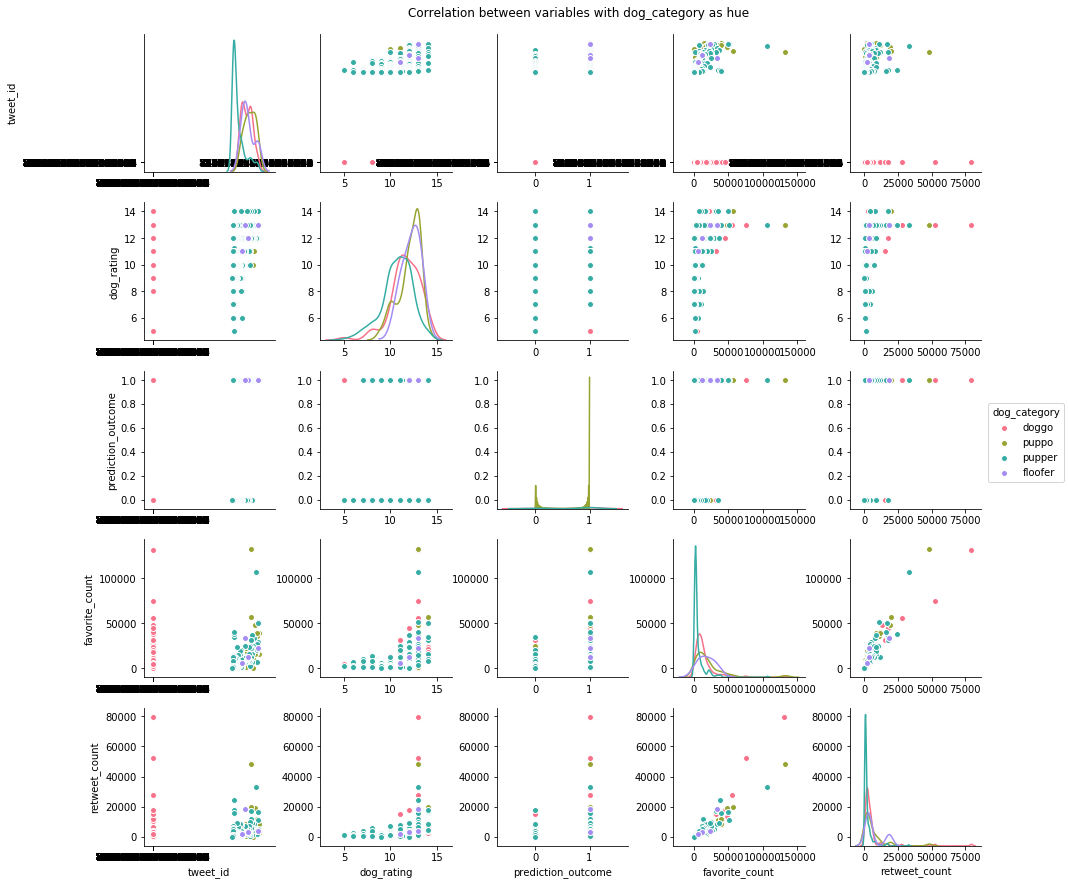

In [399]:
pp = sns.pairplot(df_master, hue="dog_category", diag_kind="kde",palette='husl')
plt.subplots_adjust(top=0.95)
pp.fig.suptitle('Correlation between variables with dog_category as hue')

In [400]:
corr = df_master.loc[:,(df_master.dtypes == 'float64')|(df_master.dtypes == 'int64')].corr()

fig, ax = plt.subplots()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,ax=ax,annot=False, cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.set_title('Correlation between Variables of datatypes Float & Int')
ax.set_xlabel('Float & Int Variables')
ax.set_ylabel('Float & Int Variables')

Text(50.0938,0.5,'Float & Int Variables')

The above two visuals confirms the fairly obvious correlation between retweet count & favourite count

**Does year tweet affect rating, retweets & favourite counts. Let's check**

In [401]:
df_master.groupby(df_master.datetime.dt.year).dog_rating.mean()

datetime
2015     9.622364
2016    10.868611
2017    12.469466
Name: dog_rating, dtype: float64

There is a clear increase in rating over the 3 year period for which we have data.

**Dog rating trend over the years**

In [402]:
ax = df_master.groupby(df_master.datetime.dt.year).dog_rating.mean().plot(label='Average dog ratings')
plt.title("Trends in Rating over years")
plt.xlabel("Years")
plt.legend()
ax.locator_params(integer=True)
plt.rcParams["figure.figsize"] = (8,5)

**Retweets & favourite count trend over the years**

In [403]:
ax = df_master.groupby(df_master.datetime.dt.year).favorite_count.mean().plot(label='Average Favourites')
ax = df_master.groupby(df_master.datetime.dt.year).retweet_count.mean().plot(label='Average Retweets')
plt.title("Trends in Retweets & favourite count over years")
plt.xlabel("Years")
plt.legend()
ax.locator_params(integer=True)
plt.rcParams["figure.figsize"] = (8,5)

There is a clear increase in rating, favourites & retweets over the 3 year period for which we have data. There is also notable uptick in all parameters during 2016 which is when "they're good dogs Brent" tweet happened. While favourites have skyrocketed, the retweets have grown steadily

In [404]:
#Replacing True / False values in prediction_outcome columns with Yes/No 
df_master['prediction_outcome'] = df_master['prediction_outcome'].replace({True: 'Yes', False: 'No'})

In [405]:
#Copying dataframe on condition of prediction outcome being True/False (confirmed as dog by the neural network)
all_dogs = df_master[df_master['prediction_outcome']=='Yes']
not_dogs = df_master[df_master['prediction_outcome']=='No']

**Top breeds by number**

Text(0,0.5,'Dog Breed')

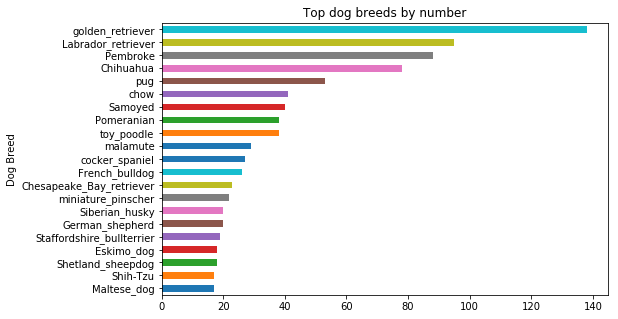

In [406]:
#Plotting most popular dog breeds from the data
all_dogs.dog_breed.value_counts()[20::-1].plot(kind='barh')
plt.title("Top dog breeds by number")
plt.ylabel("Dog Breed")

In [407]:
#extracting year of tweet for heatmap visualiztion
all_dogs['year'] = pd.DatetimeIndex(all_dogs['datetime']).year

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [408]:
filtered = all_dogs.groupby('dog_breed').filter(lambda x: len(x) > 17)

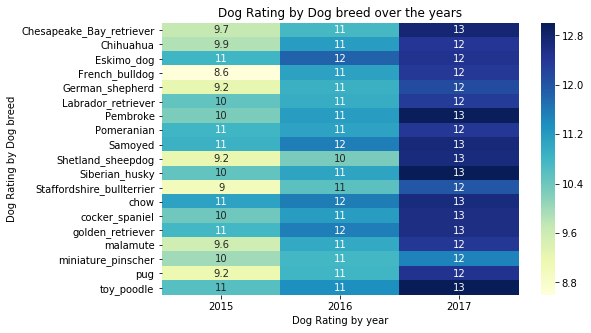

In [409]:
heatmap_df = filtered.groupby(['dog_breed','year']).dog_rating.mean().reset_index()
hm_data = heatmap_df.pivot('dog_breed','year','dog_rating')

fig, ax = plt.subplots()
ax = sns.heatmap(hm_data,ax=ax, annot=True,cmap="YlGnBu")
ax.set_title('Dog Rating by Dog breed over the years')
ax.set_xlabel('Dog Rating by year')
ax.set_ylabel('Dog Rating by Dog breed')
plt.rcParams["figure.figsize"] = (8,8)

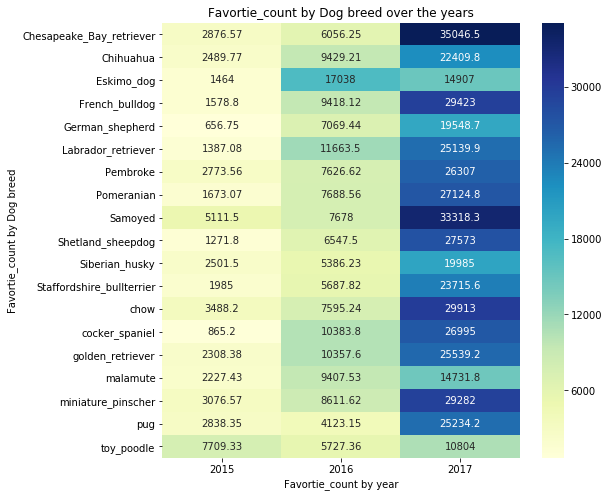

In [410]:
heatmap_df = filtered.groupby(['dog_breed','year']).favorite_count.mean().reset_index()
hm_data = heatmap_df.pivot('dog_breed','year','favorite_count')

fig, ax = plt.subplots()
ax = sns.heatmap(hm_data,ax=ax, annot=True,cmap="YlGnBu",fmt='g')
ax.set_title('Favortie_count by Dog breed over the years')
ax.set_xlabel('Favortie_count by year')
ax.set_ylabel('Favortie_count by Dog breed')
plt.rcParams["figure.figsize"] = (8,8)

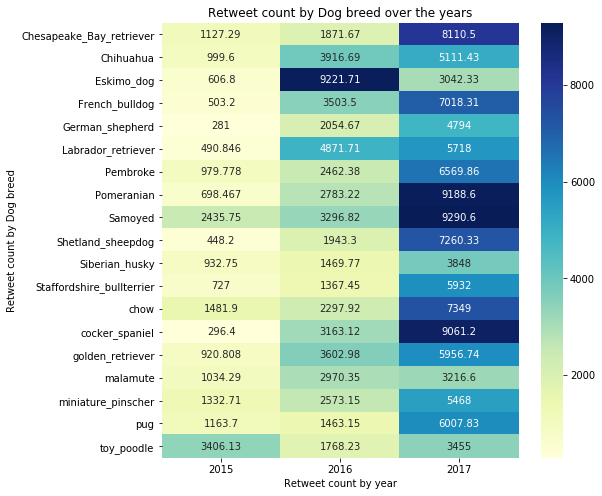

In [411]:
heatmap_df = filtered.groupby(['dog_breed','year']).retweet_count.mean().reset_index()
hm_data = heatmap_df.pivot('dog_breed','year','retweet_count')

fig, ax = plt.subplots()
ax = sns.heatmap(hm_data,ax=ax, annot=True,cmap="YlGnBu",fmt='g')
ax.set_title('Retweet count by Dog breed over the years')
ax.set_xlabel('Retweet count by year')
ax.set_ylabel('Retweet count by Dog breed')
plt.rcParams["figure.figsize"] = (8,8)

**Checking the rating for rows classified as not dogs**

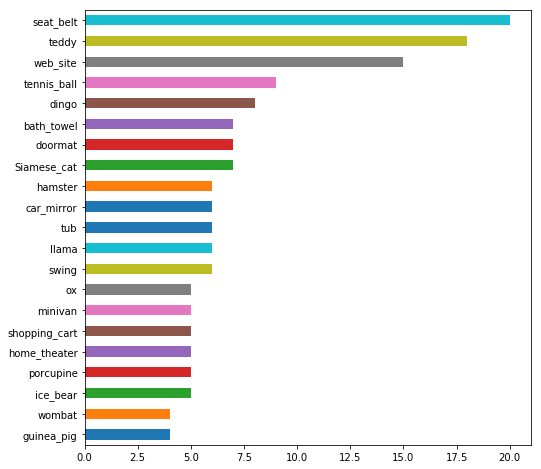

In [412]:
not_dogs.dog_breed.value_counts()[20::-1].plot(kind='barh')
filtered2 = not_dogs.groupby('dog_breed').filter(lambda x: len(x) > 4)

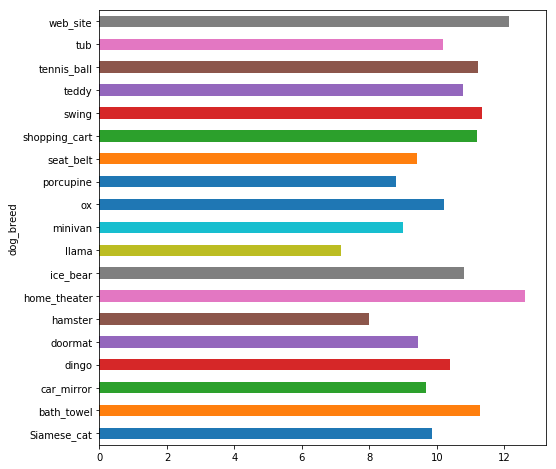

In [413]:
filtered2.groupby(['dog_breed']).dog_rating.mean().plot(kind="barh")

The above data shows several non dog pictures have been rated above 10 (sometimes 12). While there could be one off instances like these, there seems to be a significant number to this subset of categories which are rated highly. Perhaps few of the images might have been incorrectly recognized as not dogs. maybe the 2nd and 3rd predictions will have answers to this.

In [415]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0